# Q1

In [1]:
#Cell 1.1
%pip install biopython
%pip install pandas
%pip install --upgrade nbformat
%pip install chart-studio
%pip install cufflinks --upgrade
%pip install colorama
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Cell 1.2
import csv
from Bio import Entrez
from Bio import Medline
import json

In [3]:
#Cell 1.3
startdate = "2020/01/01"
enddate = "2020/08/30"
keyword = """((("2020/01/01"[Date - Publication] : "2020/8/30"[Date - Publication])) AND HIV[Title/Abstract]"""

In [3]:
##Cell 1.4
## Use this code if faced with a certificate error 

# import requests
# requests.packages.urllib3.disable_warnings()

# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     # Legacy Python that doesn't verify HTTPS certificates by default
#     pass
# else:
#     # Handle target environment that doesn't support HTTPS verification
#     ssl._create_default_https_context = _create_unverified_https_context

In [4]:
#Cell 1.5
Entrez.email = "annijo99@gmail.com"  # Always tell NCBI who you are
handle = Entrez.esearch(db="pubmed", 
                        term=keyword, 
                        retmax="10000")
record = Entrez.read(handle)
idlist = record["IdList"]

In [5]:
#Cell 1.6
len(idlist)

9999

In [6]:
#Cell 1.7
csvfile = open('pubmed_results.csv', 'w', encoding = 'utf-8', newline='')
csvwriter = csv.writer(csvfile)
csvwriter.writerow(["title", "author", "publication_time", "abstract"])

40

In [7]:
#Cell 1.8
handle = Entrez.efetch(db="pubmed", id=idlist, rettype="medline", retmode="text")
records = Medline.parse(handle)
from http.client import IncompleteRead

for record in records:
    try:
        title = record.get("TI", "")  # paper title
        author = record.get("AU", "")  # author list
        pubdate = record.get("DEP", "") # elctronic publication time
        abstract = record.get("AB", "") # abstract
        line = [title, author, pubdate, abstract]
        if line:
            csvwriter.writerow(line)
        else:
            print(line)
    except IncompleteRead as e:
        print(e)

# Q2

In [15]:
# Cell 2.1
import csv
import sqlite3

# create sqlite3 database
f = open("pubmed.db", "w")
f.close()

# connect to database
conn = sqlite3.connect("pubmed.db")

c = conn.cursor()

create_pubmed_table_sql = (
    """CREATE TABLE IF NOT EXISTS pubmed(title, author, pubdate, abstract)"""
)
c.execute(create_pubmed_table_sql)

with open("pubmed_results.csv", "r", encoding='UTF8') as f:
    reader = csv.reader(f)
    headers = next(reader)
    for row in reader:
        c.execute(
            "INSERT INTO pubmed VALUES (?, ?, ?, ?)",
            (row[0], row[1], row[2], row[3]),
        )

conn.commit()
conn.close()

In [9]:
# Cell 2.2
import sqlite3

# print the data
# get data from database
conn = sqlite3.connect("pubmed.db")
c = conn.cursor()
author = input("What author would you like to search for?: ") 
c.execute(f"SELECT * FROM pubmed where author like '%{author}%'")
rows = c.fetchall()

number = "{} has {} articles"
print(number.format(author, len(rows)))



for idx, row in enumerate(rows):
    print(idx, row)
    
conn.close()

What author would you like to search for?: Chan
Chan has 271 articles
0 ('Factors associated with knowledge and use of hiv prevention strategies among female sex workers in 12 brazilian cities.', "['Kolling AF', 'Oliveira SB', 'Merchan-Hamann E']", '20200610', 'This article aims to Identify factors associated with knowledge and use of combined HIV prevention strategies among female sex workers (FSW). Cross-sectional epidemiological study, using the Respondent Driven Sampling (RDS) method. Descriptive analyzes were performed after adjustments required by the RDS method. To investigate factors associated with knowledge of PEP and PrEP and use of the female condom, Poisson regression was applied, using odds ratio as an association measure. FSW not affiliated with NGOs, who did not receive informational material on prevention and / or participated in lectures in the last six months and who do not identify themselves as FSW in healthcare service facilities have less knowledge about PEP and 

# Q3

In [16]:
#Cell 3.1
# i) Read the csv file

import pandas as pd

dtype = {'title': str,
         'author': str,
         'publication_time': str,
         'abstract': str
        }
df = pd.read_csv('pubmed_results.csv', encoding = 'latin1', dtype=dtype)
df

,title,author,publication_time,abstract
0,A multi-parameter diagnostic clinical decision...,"['van Hoving DJ', 'Meintjes G', 'Maartens G', ...",20220512,Background: Early diagnosis is essential to re...
1,The combination of low level laser therapy and...,"['Lugongolo MY', 'Manoto SL', 'Ombinda-Lemboum...",20200604,BACKGROUND: Human immunodeficiency virus (HIV)...
2,Barriers to HIV Care by Viral Suppression Stat...,NaN,20200817,NaN
3,Evaluating Translation of HIV-Related Legal Pr...,"['Adia AC', 'Lee CJ', 'Restar AJ', 'Obiakor BC...",20200325,Legal protections for people living with HIV (...
4,Host Directed Therapies for Tuberculous Mening...,"['Davis AG', 'Donovan J', 'Bremer M', 'Van Too...",20210701,A dysregulated host immune response significan...
...,...,...,...,...
9989,HIV residual risk in Canada under a three-mont...,"[""O'Brien SF"", 'Gregoire Y', 'Pillonel J', 'St...",20191127,"BACKGROUND AND OBJECTIVES: In Canada, the defe..."
9990,High rate of hepatitis C virus and human immun...,"['Candotti D', 'Sauvage V', 'Cappy P', 'Boulla...",20191127,BACKGROUND: False positivity in blood screenin...
9991,Not a victim: How self-deception saved David.,['Graber LS'],20191128,This paper summarizes a course of psychotherap...
9992,Intimate Partner Violence and Pre-exposure Pro...,"[""O'Malley TL"", 'Hawk ME', 'Egan JE', 'Krier S...",NaN,Pre-exposure prophylaxis (PrEP) is a valued co...


In [17]:
#Cell 3.2 
from datetime import datetime, date, timedelta
pd.options.mode.chained_assignment = None

NoDate = df['publication_time'].isnull().values.ravel().sum()
print(df.count())

df = df.dropna(subset=['publication_time'])
print(df.count())

df['publication_time'] = pd.to_datetime(df['publication_time'])
df['publication_month'] = df['publication_time'].dt.strftime('%b-%Y')
df['month'] = df['publication_time'].dt.strftime('%b')
df['publication_year'] = df['publication_time'].dt.strftime('%Y')

title               9982
author              9942
publication_time    7894
abstract            9333
dtype: int64
title               7894
author              7871
publication_time    7894
abstract            7526
dtype: int64


In [18]:
##Cell 3.3
print(df.count())
df = df[(df['publication_year'] >= "2020") & (df['publication_year'] <= "2020")]
months = ["Jan", 
          "Feb", 
          "Mar",
          "Apr",
          "May",
          "Jun", 
          "Jul", 
          "Aug"]
df = df[df['month'].isin(months)]
df.count()

title                7894
author               7871
publication_time     7894
abstract             7526
publication_month    7894
month                7894
publication_year     7894
dtype: int64


title                6705
author               6685
publication_time     6705
abstract             6372
publication_month    6705
month                6705
publication_year     6705
dtype: int64

In [19]:
#Cell 3.4
# ii) show the number of publications in each month

df = df.sort_values(by=['publication_time'])

#-----------------------------------------------------------------------------

uniquemonths = pd.unique(df['publication_month'])
monthlist = list(uniquemonths)

#-----------------------------------------------------------------------------

countlist = []
index = 0

while index < len(monthlist):
    month = monthlist[index]
    y = len(df[(df['publication_month'] == month)])
    countlist.append(y)
    index += 1

monthcount = {'Month':monthlist, 'Count':countlist}
monthcountdf = pd.DataFrame(monthcount)

#-----------------------------------------------------------------------------

sdate = monthlist[0]
if monthlist[len(monthlist) - 1] == 'nan':
    NoDate = countlist[len(countlist) - 1]
    edate = monthlist[len(monthlist)-2]
else:
    edate = monthlist[len(monthlist)-1]
    
#-----------------------------------------------------------------------------
    
DateList = pd.date_range(sdate, edate, freq = 'MS').strftime('%b-%Y').tolist()
DateRange = {'Month':DateList}
DateRangedf = pd.DataFrame(DateRange)
monthcountdf2 = DateRangedf.merge(monthcountdf, on = 'Month', how = 'left')
monthcountdf2['Count'] = monthcountdf2['Count'].fillna(0)
monthcountdf2 = monthcountdf2.astype({"Count": int})

#-----------------------------------------------------------------------------

a = monthcountdf2['Count'].tolist()
DateList2 = pd.date_range(sdate, edate, freq = 'MS')
monthcountdf3 = pd.DataFrame(a, columns = ['Count'], index = DateList2)

print("Number of Papers Missing an Electronic Publication Date:", NoDate)
    
monthcountdf2

Number of Papers Missing an Electronic Publication Date: 2100


,Month,Count
0,Jan-2020,764
1,Feb-2020,774
2,Mar-2020,846
3,Apr-2020,821
4,May-2020,828
5,Jun-2020,876
6,Jul-2020,907
7,Aug-2020,889


In [20]:
#Cell 3.5
# iii) generate and visualize the summary statistics for the publication numbers per month, including mean,
# SD, range, median, 1st to 3rd quartile

import numpy as np
import statistics
import plotly.graph_objs as go
from plotly.offline import iplot
from colorama import Fore, Style

monthmean = statistics.mean(monthcountdf2['Count'])
monthSD = statistics.stdev(monthcountdf2['Count'])
monthmed = statistics.median(monthcountdf2['Count'])
monthquartiles = np.quantile(monthcountdf2['Count'], [0.25, 0.5,  0.75, 1])
monthQ1 = monthquartiles[0]
monthQ3 = monthquartiles[2]
monthmin = min(monthcountdf2['Count'])
monthmax = max(monthcountdf2['Count'])
monthrange = [monthmin, monthmax]

#-----------------------------------------------------------------------------

print(Fore.BLUE + Style.BRIGHT + "Summary Statistics for Count of Electronic Publications per Month")
print(Fore.GREEN +"Mean:", monthmean)
print("Standard Deviation:", monthSD)
print("Median:", monthmed)
print(Fore.RED + "Quartiles:", monthquartiles)
print("1st Quartile:", monthQ1)
print("3rd Quartile:", monthQ3)
print(Fore.MAGENTA + "Minimum:", monthmin)
print("Maximum:", monthmax)
print("Range:", monthrange)

#-----------------------------------------------------------------------------

fig = go.Figure()
fig.add_trace(go.Box(
    y = monthcountdf2.loc[monthcountdf2['Month'] != 'nan']['Count'],
    name = 'Electronic Publications per Month',
    marker = dict(
        color = 'rgb(200, 26, 69)',
    ),
    boxmean = 'sd'
))

iplot(fig)

Summary Statistics for Count of Electronic Publications per Month
Mean: 838.125
Standard Deviation: 51.86641495225981
Median: 837.0
Quartiles: [809.25 837.   879.25 907.  ]
1st Quartile: 809.25
3rd Quartile: 879.25
Minimum: 764
Maximum: 907
Range: [764, 907]


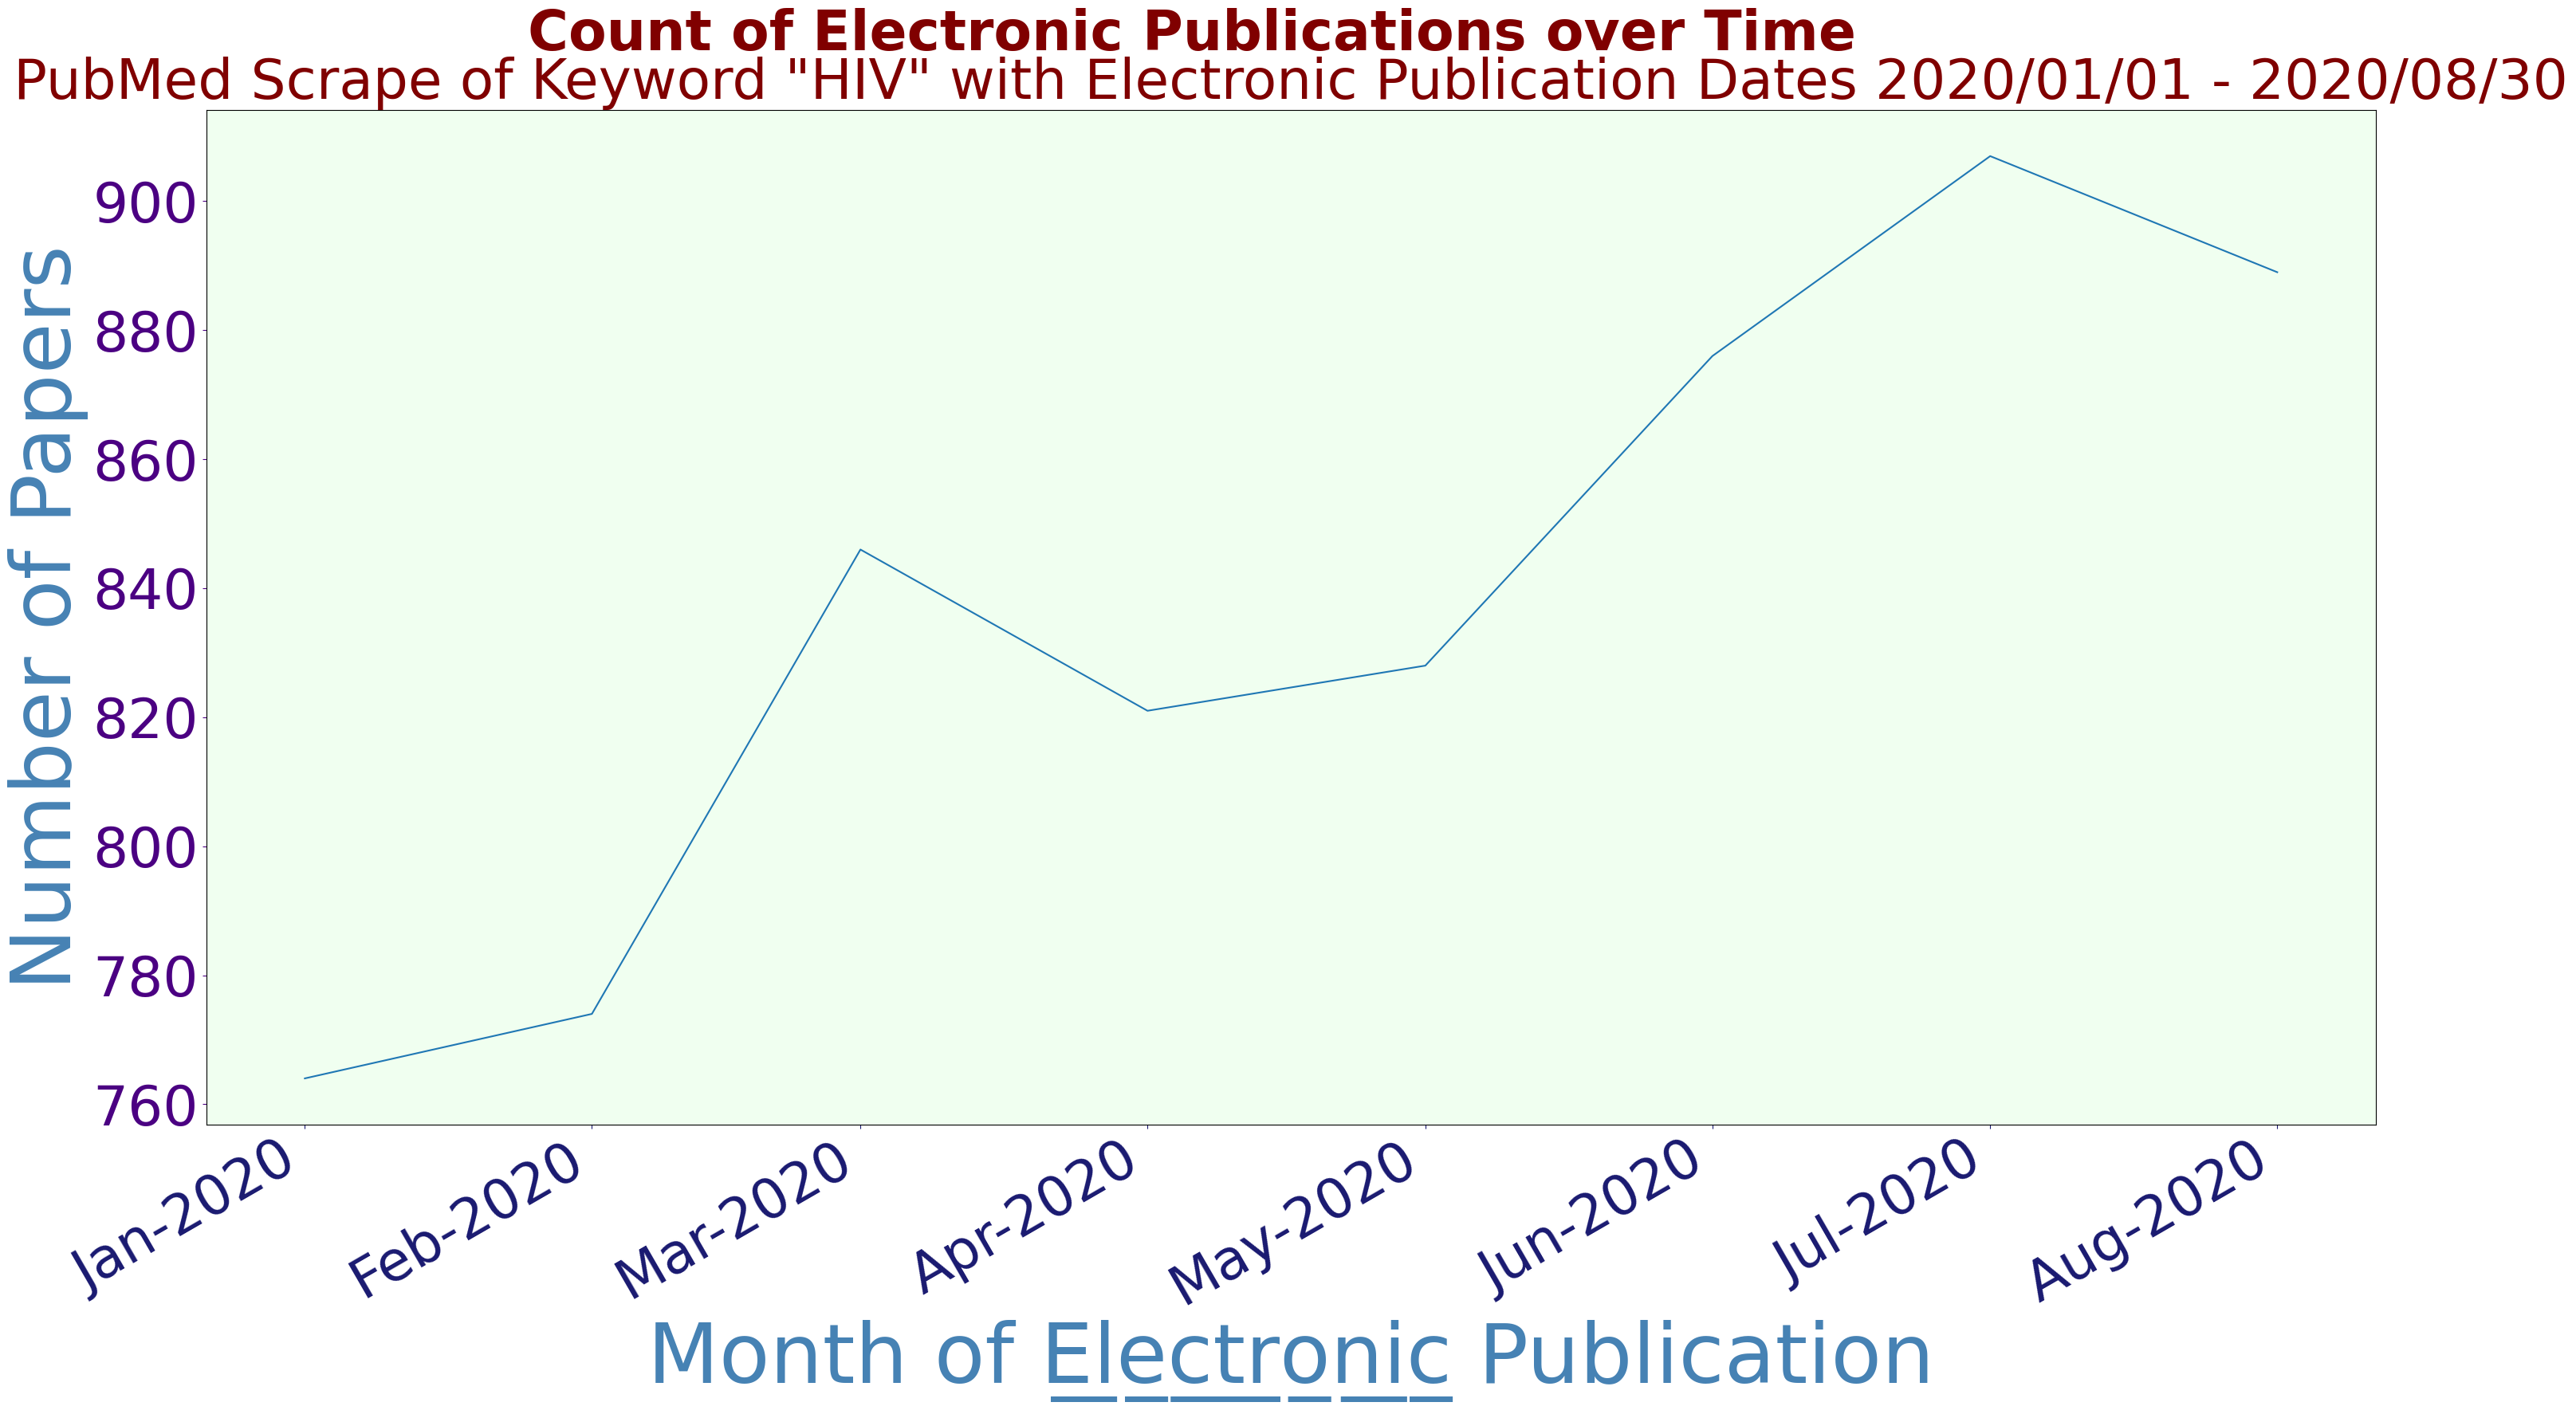

In [21]:
#Cell 3.6
# iv) visualize the trend of the publication numbers over time (by
# months). Be creative about visualization (e.g., you can create your own dashboard).

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

plt.rcParams["figure.figsize"] = [30, 18]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
ax.plot(monthcountdf3.index, monthcountdf3['Count'])

#-----------------------------------------------------------------------------

plt.suptitle("Count of Electronic Publications over Time", fontsize = 50, fontweight = 'bold', color = 'maroon')
plt.title("PubMed Scrape of Keyword \"HIV\" with Electronic Publication Dates " + startdate + " - " + enddate, 
            fontsize = 50, color = 'maroon')

plt.xlabel("Month of " + "\u0332".join("Electronic ") + "Publication", fontsize = 75, color = 'steelblue')
plt.ylabel("Number of Papers", fontsize = 75, color = 'steelblue')

ax.tick_params(axis = 'x', colors = 'midnightblue', labelsize=50)
ax.tick_params(axis = 'y', colors = 'indigo', labelsize=50)
ax.set_facecolor('honeydew')

#-----------------------------------------------------------------------------

ax.xaxis_date()   
date_form = DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(date_form)
fig.autofmt_xdate() 
plt.show()